<a href="https://colab.research.google.com/github/tayyab298/Data-Science-projects/blob/master/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AUTHOR-TAYYAB KHAN**
   
    Copyright Tayyab Khan,2021




Task-2 Prediction using Unsupervised ML.
Dataset-https://bit.ly/3kXTdox

In [3]:
#importing the required libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

Reading the Dataset:

In [4]:
#loading the iris dataset
iris_data=sns.load_dataset('iris')
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
iris_data.info()
print('\n','Shape : ',iris_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

 Shape :  (150, 5)


In [28]:
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


Numerical and Categorical features:

In [9]:
data_Num=iris_data.select_dtypes(np.number)
data_Cat=iris_data.select_dtypes(object)
print('Numerical features :')
print(data_Num.columns,'\n')
print('Categorical features :')
print(data_Cat.columns)


Numerical features :
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object') 

Categorical features :
Index(['species'], dtype='object')


**Visualisations using Pairplot:**

<Figure size 864x720 with 0 Axes>

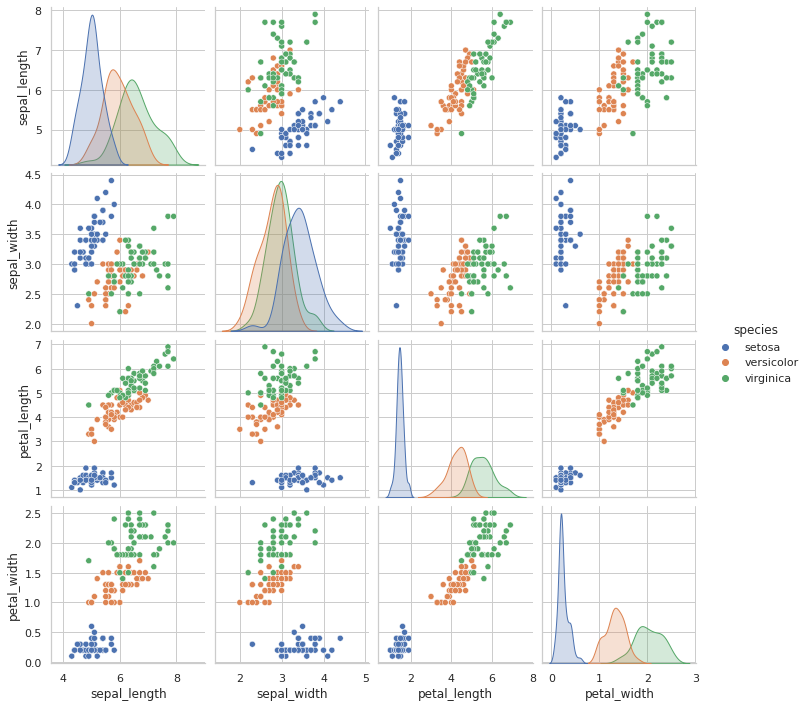

In [11]:
plt.figure(figsize=(12,10))
sns.set_theme(style='whitegrid')
sns.pairplot(iris_data,hue='species')
plt.show()



*   Three different clusters can be seen from above plot.
*   A linear relationship can be observed among independent attributes.



#Checking the Null/Missing Values:#

In [15]:
count=iris_data.isna().sum()
percentage=((count/iris_data.shape[0])*100)
null=pd.DataFrame(pd.concat([count,percentage],keys=['Missing values','% Missing Values'],axis=1))
null

,Missing values,% Missing Values
sepal_length,0,0.0
sepal_width,0,0.0
petal_length,0,0.0
petal_width,0,0.0
species,0,0.0


**Visualisation of spread and Distribution of data:**

Spread of data : 


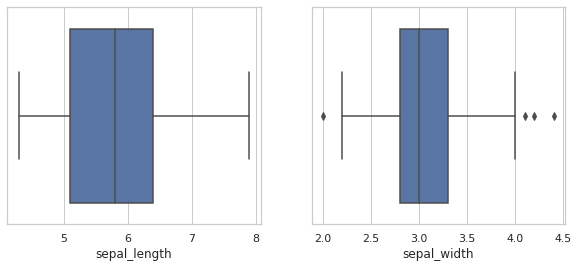

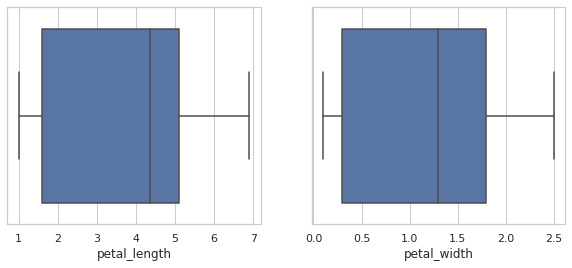



Distribution of data : 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

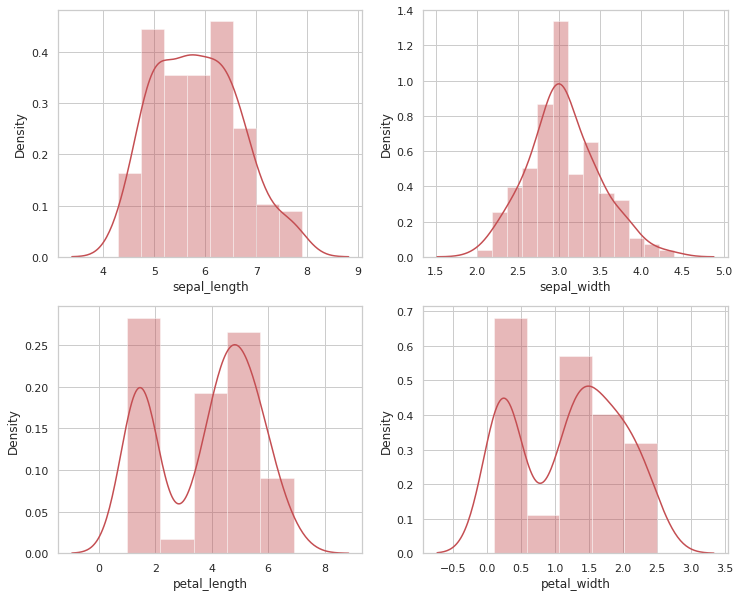

In [40]:
plt.rcParams['figure.figsize']=(10,4)
print('Spread of data : ')
fig,axes=plt.subplots(1,2)
sns.boxplot(x=iris_data['sepal_length'],ax=axes[0])
sns.boxplot(x=iris_data['sepal_width'],ax=axes[1])
plt.show()
fig,axes=plt.subplots(1,2)
sns.boxplot(x=iris_data['petal_length'],ax=axes[0])
sns.boxplot(x=iris_data['petal_width'],ax=axes[1])
plt.show()
print('\n')
print('Distribution of data : ')
j=1
plt.figure(figsize=(12,10))
for i in data_Num:
    plt.subplot(2,2,j)
    sns.distplot(iris_data[i],color='r')
    j+=1
plt.show()



*   The distribution of the data signifies a near normal distribution.

*   No significant effect of outliers is observed from the distribution plots.



Data Scaling and Preparation:

In [41]:
df=iris_data.drop('species',axis=1)
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [43]:
#standard scaling the dataset
Ss=StandardScaler()
df_sc=pd.DataFrame(data=Ss.fit_transform(df),columns=df.columns)
df_sc.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
5,-0.537178,1.939791,-1.169714,-1.052180
6,-1.506521,0.788808,-1.340227,-1.183812
7,-1.021849,0.788808,-1.283389,-1.315444
8,-1.748856,-0.362176,-1.340227,-1.315444
9,-1.143017,0.098217,-1.283389,-1.447076


*Finding the optimal number of clusters using Elbow plot method.

   No of Clusters      Errors
0               1  600.000000
1               2  222.361705
2               3  139.825435
3               4  114.304495
4               5   90.879389
5               6   80.022496
6               7   71.047810
7               8   62.582059
8               9   55.770781


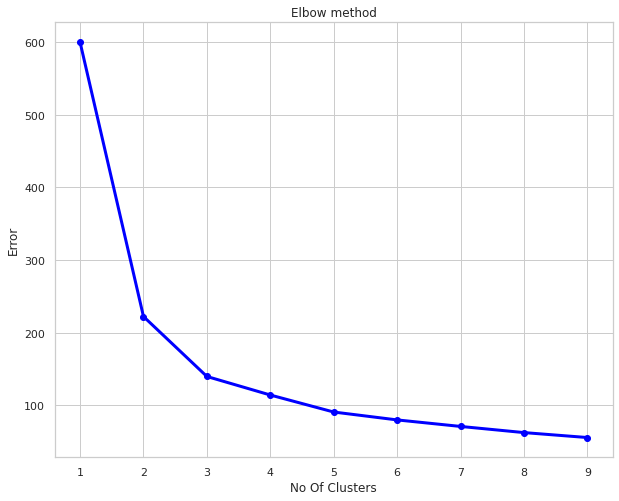

In [48]:
#calculating the inertia
k=range(1,10)
error=[]

for cluster in k:
  kmeans=KMeans(n_clusters=cluster)
  kmeans.fit(df_sc)
  err=kmeans.inertia_
  error.append(err)
data=pd.DataFrame({'No of Clusters':k, 'Errors':error})
print(data.sort_values(by='Errors',ascending=False))

#Visualisation of Elbow plot:
plt.rcParams['figure.figsize']=(10,8)
plt.plot(range(1,10),error,marker='o',color='blue',linewidth=3,markersize=6)
plt.xlabel('No Of Clusters')
plt.ylabel('Error')
plt.title('Elbow method')
plt.show()

It can be clearly seen from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we can choose the number of clusters as 3.

*Cross checking the optimal value using Silhouette score:*

In [49]:
#Calculating the silhouette_score:
for clusters in range(2,10):
    model  = KMeans(clusters)
    model.fit(df_sc)
    sil_score = silhouette_score(df_sc,model.labels_)
    print('silhouette_score for', clusters,'clusters:',sil_score)

silhouette_score for 2 clusters: 0.5817500491982808
silhouette_score for 3 clusters: 0.45994823920518646
silhouette_score for 4 clusters: 0.41889233981710045
silhouette_score for 5 clusters: 0.34194697093163473
silhouette_score for 6 clusters: 0.3313169297615483
silhouette_score for 7 clusters: 0.3408695930506712
silhouette_score for 8 clusters: 0.3418356727528772
silhouette_score for 9 clusters: 0.35612090212107705


From the silhouette scores I will be considering 3 clusters as the optimal no of clusters.

#Fitting the Kmeans Clustering algorithm with 3 clusters#

In [52]:
#Applying K Means algorithm:

kmeans = KMeans(n_clusters=3)
kmeans.fit(df_sc)
df_k=df_sc.copy()
df_k['lables_k'] = kmeans.labels_
print('Cluster centers : ',kmeans.cluster_centers_,'\n')
print('Cluster labels : ',kmeans.labels_)
df_k.head(10)


Cluster centers :  [[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]] 

Cluster labels :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


,sepal_length,sepal_width,petal_length,petal_width,lables_k
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,1
2,-1.385353,0.328414,-1.397064,-1.315444,1
3,-1.506521,0.098217,-1.283389,-1.315444,1
4,-1.021849,1.249201,-1.340227,-1.315444,1
5,-0.537178,1.939791,-1.169714,-1.052180,1
6,-1.506521,0.788808,-1.340227,-1.183812,1
7,-1.021849,0.788808,-1.283389,-1.315444,1
8,-1.748856,-0.362176,-1.340227,-1.315444,1
9,-1.143017,0.098217,-1.283389,-1.447076,1


#Visualisation and comparison of clusters.

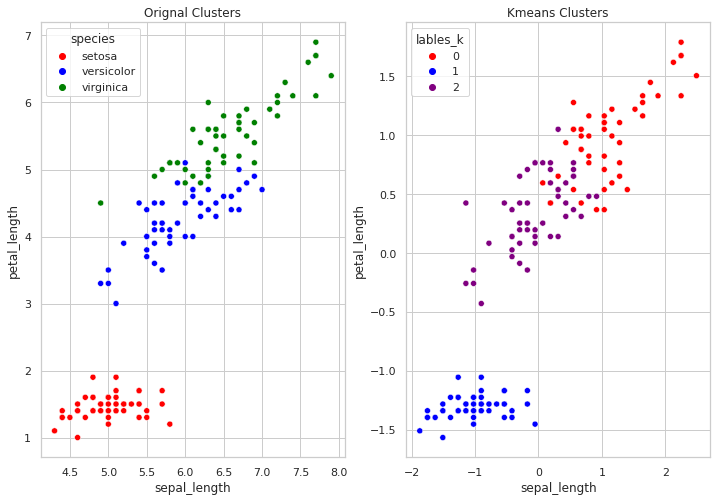

In [53]:
plt.rcParams['figure.figsize']=(12,8)
plt.subplot(1,2,1)
plt.title('Orignal Clusters')
sns.scatterplot(x='sepal_length',y='petal_length',hue='species',data=iris_data,
                palette=['red','blue','green'])
plt.subplot(1,2,2)
plt.title('Kmeans Clusters')
sns.scatterplot(x='sepal_length',y='petal_length',hue='lables_k',data=df_k,
                palette=['red','blue','purple'])
plt.show()



1.   3 distinct clusters can be observed in both the above plots.
2.   Kmeans has done a good job in distinguishing the clusters but some overlapping datapoints can be observed.

